In [3]:
import pandas as pd
import h5py

In [4]:
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'svg')
set_matplotlib_formats('retina', 'png')

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

import mpld3

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")

# lowess for plotting
from statsmodels.nonparametric.smoothers_lowess import lowess

def stairs(df, start='start', end='end', pos='pos', endtrim=0):
    "Turn a df with start, end into one with pos to plot as stairs"
    df1 = df.copy(deep=True)
    df2 = df.copy(deep=True)
    df1[pos] = df1[start]
    df2[pos] = df2[end] - endtrim
    return pd.concat([df1, df2]).sort_values([start, end])

In [6]:
h5 = h5py.File('../steps/clues/clues_2_136608646_CEU.h5', 'r')

In [7]:
for key, val in h5.attrs.items():
#     print(key, val)
    print(key, val.shape)

freqs (45,)
iHat ()
iSel (1,)
jHat ()
popsize (40,)
sGrid (50,)
sHat ()
samplingPopsize (40,)
t (40,)
tHat ()
xHat (39,)
xHatHi (39,)
xHatLo (39,)


In [8]:
for key, val in h5.items():
    print(key, val.shape)

logImportanceWeights (50, 1, 291)
logLikelihoodRatios (50, 1)
xMargs (39, 45)


In [9]:
h5['logImportanceWeights'][0]

array([[-556.45023362, -424.28859659, -428.01592398, -480.35988622,
        -456.33052599, -533.06528701, -621.27379668, -605.85500329,
        -574.10252194, -586.4334661 , -598.5405137 , -593.98848937,
        -694.27458172, -604.5592601 , -659.42157969, -592.4050548 ,
        -640.20369452, -605.32557574, -649.76436318, -634.41218664,
        -644.44413999, -562.77362609, -584.8478456 , -573.76882688,
        -579.02005645, -686.8183282 , -584.6362625 , -545.44108013,
        -545.1057994 , -567.96401585, -471.56766078, -513.81956422,
        -470.0800408 , -495.73910028, -531.67573035, -528.98169264,
        -566.82025413, -556.13805848, -545.71265984, -503.1667968 ,
        -459.45426922, -472.22257226, -441.82867211, -441.17454103,
        -428.40891641, -442.20419671, -418.28590227, -422.84827941,
        -372.3734258 , -371.23553831, -439.21106955, -446.09261158,
        -434.57329867, -407.97460073, -372.84613548, -383.33382363,
        -409.60885201, -442.99063672, -439.38782

In [10]:
h5['logLikelihoodRatios'][:10]

array([[0.        ],
       [0.06425493],
       [0.14471274],
       [0.24555967],
       [0.37211743],
       [0.53117696],
       [0.7314382 ],
       [0.98408592],
       [1.30352847],
       [1.7083067 ]])

In [11]:
h5['xMargs']

<HDF5 dataset "xMargs": shape (39, 45), type "<f8">

In [12]:
# ax = sns.heatmap(h5['xMargs']) ;
# ax.invert_yaxis()

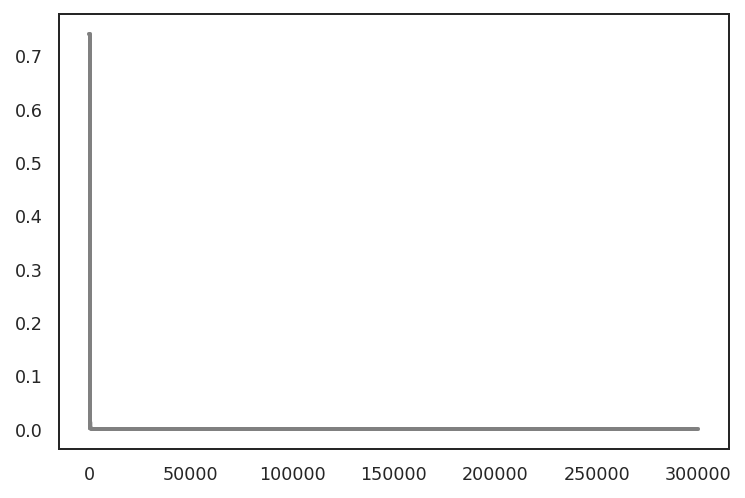

In [13]:
df = pd.DataFrame(dict(start=h5.attrs['t'][:-1], 
                       end=h5.attrs['t'][1:], 
                       freq=h5.attrs['xHat'],
                       upper=h5.attrs['xHatHi'],
                       lower=h5.attrs['xHatLo']
                           ))

plot_df = stairs(df)
with sns.axes_style('white'):
    plt.plot(plot_df.pos, plot_df.upper, color='lightgrey', linewidth=2)
    plt.plot(plot_df.pos, plot_df.lower, color='lightgrey', linewidth=2)
    plt.plot(plot_df.pos, plot_df.freq, color='grey', linewidth=2)

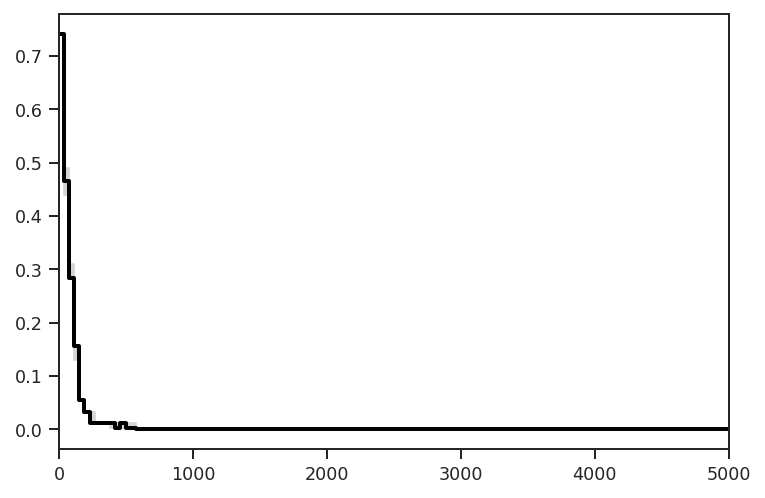

In [23]:
plot_df = stairs(df)
with sns.axes_style('ticks'):
    plt.fill_between(plot_df.pos, plot_df.upper, plot_df.lower, color='lightgrey')
    plt.plot(plot_df.pos, plot_df.freq, color='black', linewidth=2)
#    sns.despine()
    plt.xlim(0, 5000)

In [15]:
logLikeliboodRatio = h5['logLikelihoodRatios'][h5.attrs['iHat'], h5.attrs['jHat']]
selection_coefihcient = h5.attrs['sHat']

In [16]:
logLikeliboodRatio, selection_coefihcient

(471.0388556516471, 0.0353347351159627)